In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

original_housing_df = pd.read_csv('housing_iteration_0_2_classification.csv')

In [83]:
original_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [84]:
original_housing_df.sample(5)

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
777,13350,100.0,864,3,1,0,2,241,0,0
417,22420,86.0,1370,4,1,0,3,0,0,0
1133,9828,80.0,1128,3,1,0,2,0,0,0
544,17104,58.0,654,3,1,0,2,100,0,0
630,9000,50.0,636,3,0,0,1,0,0,0


In [85]:
original_housing_df.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [86]:
non_zero_pool_rows = len(original_housing_df[original_housing_df['PoolArea'] != 0])
non_zero_pool_rows

7

In [87]:
non_zero_screen_porch = len(original_housing_df[original_housing_df['ScreenPorch'] != 0])
non_zero_screen_porch

116

In [88]:
y = original_housing_df.pop("Expensive")

In [89]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [93]:
X = original_housing_df.drop(columns=['PoolArea', 'ScreenPorch', 'LotFrontage']).copy()
X.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
0,8450,856,3,0,2,0
1,9600,1262,3,1,2,298
2,11250,920,3,1,2,0
3,9550,756,3,1,3,0
4,14260,1145,4,1,3,192


In [94]:
X.isna().sum()

LotArea         0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
GarageCars      0
WoodDeckSF      0
dtype: int64

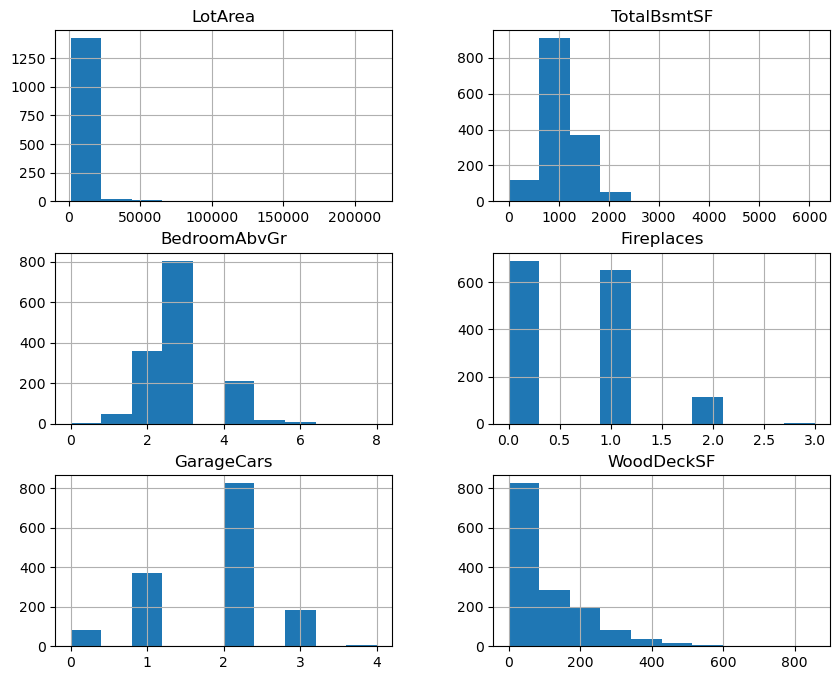

In [95]:
X.hist(figsize=(10, 8));

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [97]:
X_train.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
772,7819,1029,3,1,2,144
157,12003,774,4,1,3,0
360,7540,888,2,1,2,0
744,5395,1337,2,1,2,96
150,10356,969,3,0,2,0


In [98]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

In [99]:
X_test.head()

,LotArea,TotalBsmtSF,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF
1253,17542,1192,3,2,2,220
202,7000,617,2,0,1,0
213,13568,990,3,0,2,224
1331,10780,911,3,0,2,0
120,21453,938,1,2,2,0


In [100]:
y_test.head()

1253    1
202     0
213     0
1331    0
120     0
Name: Expensive, dtype: int64

In [101]:
y_train.value_counts()

Expensive
0    989
1    179
Name: count, dtype: int64

In [102]:
len(y_train)

1168

In [114]:
pred_extrem_train = pd.Series(0, index=range(len(y_train)))

In [115]:
pred_extrem_train

0       0
1       0
2       0
3       0
4       0
       ..
1163    0
1164    0
1165    0
1166    0
1167    0
Length: 1168, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_extrem_train
                                 )

round(train_accuracy, 2)

0.85

In [117]:
len(y_test)

292

In [118]:
pred_extrem_test = pd.Series(0, index=range(len(y_test)))

In [119]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_extrem_test
                               )

round(test_accuracy, 2)

0.87

In [131]:
# your code here
def fireplaces_model(df):
    newdf = df.assign(prediction = 0)
    newdf.loc[newdf.Fireplaces==2, "prediction"] = 1
    return newdf.prediction.tolist()

pred_fireplaces_train = fireplaces_model(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_train,
               y_pred = pred_fireplaces_train
              )

0.8184931506849316

In [132]:
pred_fireplaces_train = fireplaces_model(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_true = y_test,
               y_pred = pred_fireplaces_train
              )

0.8424657534246576